In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
# plt.style.use('classic')
# sns.set(rc={'figure.figsize':(3,3)})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
filepath = '/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/creditcard.csv'
data = pd.read_csv(filepath)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


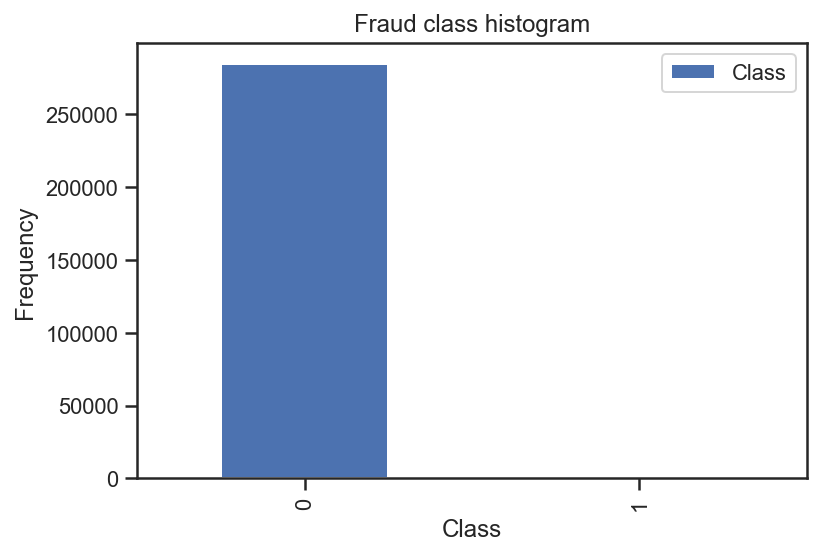

In [3]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
with sns.axes_style('ticks'):
    count_classes.plot(kind='bar')
    plt.title('Fraud class histogram')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.legend()

In [4]:
# 过采样 下采样，对数据样本不均衡有效。下采样：把样本数做为一样比例。过采样：生成新数据

from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1)) # -1,反转,[2,3],--[3,2] -1是指未设定行数，程序随机分配
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
# 下采样
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']


In [6]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
number_records_fraud

492

In [7]:
fraud_indices = np.array(data[data.Class == 1].index)
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [8]:
# Picking the indices of the normal classes
norm_indices = data[data.Class == 0].index
norm_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [9]:
# Out of the indices we picked,randomly select 'x' number(number_records_fraud)
random_normal_indices = np.random.choice(norm_indices,number_records_fraud,replace=False)
random_normal_indices

array([  7067, 142620,  81343, 121343, 121090,  35562, 241384,  39430,
       241716,  17349, 187607,  33223, 279711, 278040, 284001,  91101,
        27996, 166237,  28074, 276079, 144750,  43846, 239844, 239248,
        91911, 190010,  34659,  70313,  20600,  91294, 193158, 272332,
       208813, 278269, 183614, 145657, 282981, 205924,  55017,  22172,
       276179, 119762,  12312, 275200,  77153, 221235, 114430,  45191,
       173816, 111196, 123947,  14228, 100687,  89865, 219597, 237920,
       118974, 129314, 183812,  94121,  78053,  14256,  10693, 179919,
        77145,  98507, 273207,  41818, 100602, 206428,   9002,  71799,
        47716,  82868, 233723, 227166,  71710,  57767,  99746, 200142,
       119925, 237302,  99061,  73651, 111607,  49937,   1339, 223317,
       162648, 274756, 148280, 264332,  27918, 243036,  93727,  86029,
        96612,  32372, 279462, 164601, 133234, 197257,  97609, 153665,
        74624,  18588, 267250, 283609,   7210,  67130, 249992, 248402,
      

In [10]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [11]:
# Under sample dataset 下采样
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [12]:
# Showing ratio
print('Precentage of normal transactions:',len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print('Precentage of normal transactions:',len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Precentage of normal transactions: 0.5
Precentage of normal transactions: 0.5
Total number of transactions in resampled data:  984


In [14]:
# 交叉验证
from sklearn.model_selection import train_test_split
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random_state种子 每次分的数据都一样

print('Number transactions train dataset:', len(X_train))
print('Number transactions test dataset:', len(X_test))
print('Total number of transactions:', len(X_train)+len(X_test))

Number transactions train dataset: 199364
Number transactions test dataset: 85443
Total number of transactions: 284807


In [15]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample,
                                                                                                    test_size=0.3,
                                                                                                    random_state=0)
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


#### Recall = TP/(TP+FN)
#### Recall 召回率，查全率
#### 是模型的精度衡量标准，普通精度不严谨。
#### 某类预测结果正确数 除于 某类真实结果数
![image]('/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/1.jpg')


#### 正则化惩罚项
##### L1 L2正则化
L1: LOSS + |w|
L2: LOSS + 1/2 * w^2

In [ ]:
# Recall
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score # KFold 做几倍的交叉验证，切分训练集。 cross_val_score 交叉验证评估结果
from sklearn.metrics import confusion_matrix, recall_score, classification_report # 混淆矩阵

In [ ]:
def printing_KFold_score(x_train_data,y_train_data):
    fold = KFold(5, shuffle=False)

    # 正则化惩罚参数
    c_param_range = [0.01, 0.1, 1, 10, 100]

    results_table = pd.DataFrame(index= range(len(c_param_range), 2), columns= ['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter:  ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(y_train_data), start=1):
            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C=c_param, penalty='l1')  # C 惩罚力度， penalty 惩罚方法

            # Use the training data to fit the model. In this case,we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0], :], x_train_data.iloc[indices[0].values.ravel()])

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)




In [39]:
fold = KFold(5,shuffle=False)
for it, indx in enumerate(fold.split(y_test)):
    print(it,indx[1])

0 [    0     1     2 ... 17086 17087 17088]
1 [17089 17090 17091 ... 34175 34176 34177]
2 [34178 34179 34180 ... 51264 51265 51266]
3 [51267 51268 51269 ... 68352 68353 68354]
4 [68355 68356 68357 ... 85440 85441 85442]


In [31]:
fold



KFold(n_splits=199364, random_state=None, shuffle=False)